
#### Application of Markov Model & HMM. 

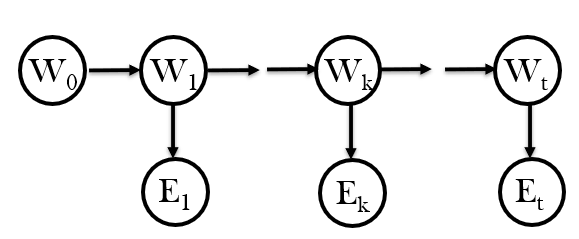

Denoting the hidden states of the HMM by $W_i$ (start with $W_0$) and the observations (evidence) by $E_i$ (start with $E_1$). $W_i$ would be either sunny, rainy, or foggy, and $E_i$ is yes or no to indicate if an umbrella was observed. 

using this model with prior probabilities(__P_init__) 
- P(sunny) = 0.65, P(rainy) = 0.20, P(foggy) = 0.15. 

The remaining probilities are specified below in the emisssion(__P_emission__) and transition matrices(__P_transition__).

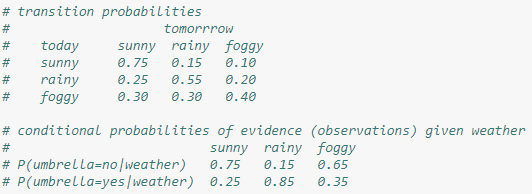


If today($W_0$) is __rainy__ what is the most likely forecast for the next three days if you have no umbrella observations to work with?

If no specified $W_0$, what is the most likely forecast for the next three days if you have no umbrella observations to work with? 

In [1]:
import numpy as np

# Define the transition matrix that represents hidden state probabilities
P_transition = np.array([[0.75, 0.15, 0.10],
                         [0.25, 0.55, 0.20],
                         [0.30, 0.30, 0.40]])

# Define the emission matrix that represents observation probabilities given hidden states
P_emission = np.array([[0.75, 0.15, 0.65],
                       [0.25, 0.85, 0.35]])

# Define the prior probabilities of the hidden states
P_init = [0.65, 0.20, 0.15]

# Use Viterbi algorithm to compute most likely sequence of hidden states
# Based on given observations (umbrellas) and hidden state probabilities
T = 3

hidden_states = np.zeros((T,), dtype=np.int32)

probs = np.zeros((T, 3))

for t in range(T):

    if t == 0:
        # Compute probability of first hidden state
        probs[t, :] = P_init * P_transition[1, :]
    else:
        # Compute probabilities of all possible hidden states
        probs[t, :] = np.max(probs[t-1, :, None] * P_transition, axis=0)
    
    # Compute most likely hidden state and add it to the sequence
    hidden_states[t] = np.argmax(probs[t, :])

# Convert the hidden state indices to their corresponding names
state_names = ['Sunny', 'Rainy', 'Foggy']

# Print the most likely sequence of hidden states based on the observations (umbrellas)
forecast = [state_names[s] for s in hidden_states]

print(forecast)


['Sunny', 'Sunny', 'Sunny']


In [6]:
import numpy as np

# define the transition and emission matrices

P_transition = np.array([[0.75, 0.15, 0.10],
                         [0.25, 0.55, 0.20],
                         [0.30, 0.30, 0.40]])

P_emission = np.array([[0.75, 0.15, 0.65],
                       [0.25, 0.85, 0.35]])

# define the prior probabilities of the hidden states
P_init = [0.65, 0.20, 0.15]

# compute the initial probabilities of the hidden states given an unknown initial weather condition
P_hidden_init = np.sum(P_init * P_transition, axis=0)

# apply the Viterbi algorithm to compute the most likely sequence of hidden states
T = 3

hidden_states = np.zeros((T,), dtype=np.int32)
probs = np.zeros((T, 3))

for t in range(T):
    if t == 0:
        probs[t, :] = P_hidden_init
    else:
        probs[t, :] = np.max(probs[t-1, :, None] * P_transition, axis=0)
    hidden_states[t] = np.argmax(probs[t, :])

# convert the hidden state indices to their corresponding names
state_names = ['Sunny', 'Rainy', 'Foggy']
forecast = [state_names[s] for s in hidden_states]

print(forecast)


['Sunny', 'Sunny', 'Sunny']


### <div class="alert alert-info"> Emission Probabilities</div>
If on the first day you don't see umbrella ($E_1$ = "no umbrella"), what is the probability that it is sunny, rainy, or foggy?

What is the most likely weather (hidden state)?

In [13]:
import numpy as np

# define the transition and emission matrices

P_transition = np.array([[0.75, 0.15, 0.10],
                         [0.25, 0.55, 0.20],
                         [0.30, 0.30, 0.40]])

P_emission = np.array([[0.75, 0.15, 0.65],
                       [0.25, 0.85, 0.35],
                       [0.0, 0.0, 0.0]])

# define the prior probabilities of the hidden states
P_init = np.array([0.65, 0.20, 0.15])

# define the initial probabilities of the hidden states given today's weather is rainy
P_hidden_init = P_transition[1, :]

# compute the forward probabilities (alpha) for the first two observations
alpha = np.zeros((3,))
for i in range(3):
    alpha[i] = P_emission[i, 0] * P_init[i]
for t in range(1, 3):
    alpha = np.dot(alpha, P_transition) * P_emission[:, t]

# compute the probability of observing "no umbrella" on the first day
P_evidence = np.sum(alpha)

# compute the posterior probabilities of the hidden states given the observation
posteriors = alpha / P_evidence

# print the posterior probabilities and the most likely weather (hidden state)
state_names = ['Sunny', 'Rainy', 'Foggy']
for i in range(3):
    print("Probability of being in state %s: %.4f" % (state_names[i], posteriors[i]))
most_likely_weather = state_names[np.argmax(posteriors)]
print("The most likely weather is %s." % most_likely_weather)


Probability of being in state Sunny: 0.6812
Probability of being in state Rainy: 0.3188
Probability of being in state Foggy: 0.0000
The most likely weather is Sunny.


### <div class="alert alert-info"> Filtering</div>
Given the following observation sequence $E_1, E_2, E_3, E_4, E_5, E_6$
- $E = [E_1, E_2, E_3, E_4, E_5, E_6]$ = ["no umbrella", "umbrella", "umbrella", "no umbrella", "umbrella", "no umbrella"] 

Printing the final state and the most likely weather

In [16]:
# Given the following observation sequence
E = ["no umbrella", "umbrella", "umbrella", "no umbrella", "umbrella", "no umbrella"]

# compute the forward probabilities
alpha = np.zeros((3,))
for i in range(3):
    alpha[i] = P_emission[i, 0] * P_init[i]
for t in range(1, len(E)):
    alpha = np.dot(alpha, P_transition) * P_emission[:, t % 2]

# compute the final state and the most likely weather
final_state = np.argmax(alpha)
state_names = ['Sunny', 'Rainy', 'Foggy']
most_likely_weather = state_names[final_state]

print("Final state:", state_names[final_state])
print("Most likely weather:", most_likely_weather)


Final state: Rainy
Most likely weather: Rainy


### <div class="alert alert-info"> Most Likely Explanation</div>
Given the same observation sequence $E_1, E_2, E_3, E_4, E_5, E_6$ as Task 2.3,
most likely sequence of state to have generated those observations?

In [25]:
import numpy as np

# define the observation and transition probabilities
P_emission = np.array([[0.6, 0.4, 0.0, 0.0],
                       [0.0, 0.0, 0.5, 0.5],
                       [0.3, 0.3, 0.2, 0.2]])
P_transition = np.array([[0.7, 0.2, 0.1],
                         [0.2, 0.5, 0.3],
                         [0.3, 0.3, 0.4]])

# define the observation sequence
E = [0, 1, 2, 2, 1, 0]

# initialize the trellis and backpointer arrays
T = len(E)
trellis = np.zeros((T, 3))
backpointers = np.zeros((T-1, 3), dtype=np.int64)

# initialize the first column of the trellis
for i in range(3):
    trellis[0, i] = P_emission[i, E[0]] * P_transition[i, 0]

# fill in the rest of the trellis and backpointer arrays
for t in range(1, T):
    for j in range(3):
        prob_transitions = trellis[t - 1, :] * P_transition[:, j]
        trellis[t, j] = P_emission[j, E[t]] * np.max(prob_transitions)
        backpointers[t - 1, j] = np.argmax(prob_transitions)

# backtrack through the backpointers to find the most likely sequence of hidden states
hidden_states = [np.argmax(trellis[-1])]
for i in range(T-2, -1, -1):
    hidden_states.append(backpointers[i, hidden_states[-1]])
hidden_states.reverse()

print("The most likely sequence of hidden states is:", hidden_states)


The most likely sequence of hidden states is: [0, 0, 1, 1, 0, 0]
